In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data Exploration: We First Explore the Dataset 

In [2]:
# We start by first importing the dataset to be used
df = pd.read_csv ("loan small.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# We identify the total number of rows and columns.
df.shape

(887379, 74)

In [6]:
#We check out the properties of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

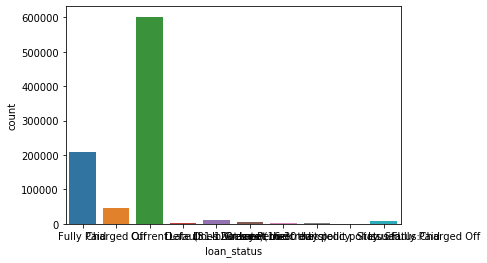

In [7]:
#Using seaborn to visualize the ratio of each category withing the dependent variable
import seaborn as sns
sns.countplot(df['loan_status'])

In [5]:
# We identify the count and percentage of missing values in the dataset.
# The count function gives the total number of missing values in the dataset
# The percentage function invloves multiplying the missing values divided by the total number of values by 100
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

#printing columns with null count more than 0
df_null[df_null['Count'] > 0]

,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
desc,761351,85.797726
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
mths_since_last_delinq,454312,51.197065
mths_since_last_record,750326,84.555303


# Data Cleaning
we will start by droping all coloumns which do not have 80% or more of data values present

In [8]:
# We then move on to drop all features with missing values less than 80%
df1 = df.dropna(axis=1, thresh=int(0.80*len(df)))
df1.shape

(887379, 52)

In [9]:
# We identify the left over columns after taking out data with 80% or more missing values.
df_null = pd.DataFrame({'Count': df1.isnull().sum(), 'Percent': 100*df1.isnull().sum()/len(df)})

#printing columns with null count more than 0
df_null[df_null['Count'] > 0]

,Count,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
annual_inc,4,0.000451
title,152,0.017129
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268
inq_last_6mths,29,0.003268
open_acc,29,0.003268
pub_rec,29,0.003268
revol_util,502,0.056571


## Feature Selection

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          887379 non-null  int64  
 1   member_id                   887379 non-null  int64  
 2   loan_amnt                   887379 non-null  float64
 3   funded_amnt                 887379 non-null  float64
 4   funded_amnt_inv             887379 non-null  float64
 5   term                        887379 non-null  object 
 6   int_rate                    887379 non-null  float64
 7   installment                 887379 non-null  float64
 8   grade                       887379 non-null  object 
 9   sub_grade                   887379 non-null  object 
 10  emp_title                   835917 non-null  object 
 11  emp_length                  842554 non-null  object 
 12  home_ownership              887379 non-null  object 
 13  annual_inc    

In [13]:
#We select features relevant to our credit scoring model
df2 = df1.filter(['loan_amnt','term','int_rate','installment','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])
df2.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
dtype: object

In [14]:
df2.shape

(887379, 12)

# ENCODING THE DEPENDENT VARIABLE
Treating the data as a classifications problem
We convert the loan status into a variable with 2 discrete numerical classes
Fullypaid = 1 and default = 0

In [15]:
# Identify the number of section divisions in the target variable.
print(df2["loan_status"].value_counts())

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64


In [16]:
#We drop all other categories within loan status leaving just fully paid,charged off and default
df2 = df2[df2.loan_status != 'Current']
df2 = df2[df2.loan_status != 'In Grace Period']
df2 = df2[df2.loan_status != 'Late (16-30 days)']
df2 = df2[df2.loan_status != 'Late (31-120 days)']
df2 = df2[df2.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df2 = df2[df2.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df2 = df2[df2.loan_status != 'Issued']

In [17]:
#We merge default and charged off loans
df2['loan_status'] = df2['loan_status'].replace({'Charged Off':'Default'})
df2['loan_status'].value_counts()

Fully Paid    207723
Default        46467
Name: loan_status, dtype: int64

# Dividing the the Dependent Varaiable into two discrete classes
using the Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# First assign the LabelEncoder to a variable
le = LabelEncoder()
# Secondly i assigned the encoded column to the variable called label
label = le.fit_transform(df2["loan_status"])

In [20]:
df2 = df2.drop("loan_status",axis = True)
# the encoded label is now added to the table as the new column with the same name loan_status
df2["loan_status"] = label

In [21]:
#Encoding and dividing the target class into two discrete variables
print(df2["loan_status"].value_counts())

1    207723
0     46467
Name: loan_status, dtype: int64


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254190 entries, 0 to 887371
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            254190 non-null  float64
 1   term                 254190 non-null  object 
 2   int_rate             254190 non-null  float64
 3   installment          254190 non-null  float64
 4   emp_length           244222 non-null  object 
 5   home_ownership       254190 non-null  object 
 6   annual_inc           254190 non-null  float64
 7   verification_status  254190 non-null  object 
 8   purpose              254190 non-null  object 
 9   dti                  254190 non-null  float64
 10  delinq_2yrs          254190 non-null  float64
 11  loan_status          254190 non-null  int32  
dtypes: float64(6), int32(1), object(5)
memory usage: 24.2+ MB


# ENCODING THE INDEPENDENT VARIABLES

In [23]:
# We identify the number of unique categories for each object
for col_name in df2.columns:
    if df2[col_name].dtypes == 'object':
        unique_cat = len (df2[col_name].unique())
        print("Feature '{col_name}'has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'term'has 2 unique categories
Feature 'emp_length'has 12 unique categories
Feature 'home_ownership'has 6 unique categories
Feature 'verification_status'has 3 unique categories
Feature 'purpose'has 14 unique categories


In [24]:
# Using one hot encoding or get dummies approach to encoding the categorical features
df_term = pd.get_dummies(df2['term'])
df_emplength = pd.get_dummies(df2['emp_length'])
df_homeownership = pd.get_dummies(df2['home_ownership'])
df_verfication = pd.get_dummies (df2['verification_status'])
df_purpose = pd.get_dummies (df2['purpose'])



In [25]:
#Merge converted data with the rest by using Concatenation  
df_concat = pd.concat([df2, df_term, df_emplength,df_homeownership,df_verfication,df_purpose], axis=1)


In [26]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254190 entries, 0 to 887371
Data columns (total 48 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            254190 non-null  float64
 1   term                 254190 non-null  object 
 2   int_rate             254190 non-null  float64
 3   installment          254190 non-null  float64
 4   emp_length           244222 non-null  object 
 5   home_ownership       254190 non-null  object 
 6   annual_inc           254190 non-null  float64
 7   verification_status  254190 non-null  object 
 8   purpose              254190 non-null  object 
 9   dti                  254190 non-null  float64
 10  delinq_2yrs          254190 non-null  float64
 11  loan_status          254190 non-null  int32  
 12   36 months           254190 non-null  uint8  
 13   60 months           254190 non-null  uint8  
 14  1 year               254190 non-null  uint8  
 15  10+ years        

In [27]:
#Drop corresponding categorical columns and first dummy variable columns.
df_concat.drop(['term', 'emp_length','home_ownership','verification_status','purpose'],axis = True)


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,loan_status,36 months,60 months,1 year,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,5000.0,10.65,162.87,24000.0,27.65,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,30000.0,1.00,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,84.33,12252.0,8.72,0.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,339.31,49200.0,20.00,0.0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,7.90,156.46,36000.0,11.20,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887351,4200.0,15.99,147.64,48000.0,36.93,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
887364,10775.0,6.03,327.95,54000.0,13.22,1.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887366,6225.0,16.49,220.37,27000.0,18.58,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887369,4000.0,8.67,126.59,50000.0,12.63,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# We check to see if the property of the data type changed
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254190 entries, 0 to 887371
Data columns (total 48 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            254190 non-null  float64
 1   term                 254190 non-null  object 
 2   int_rate             254190 non-null  float64
 3   installment          254190 non-null  float64
 4   emp_length           244222 non-null  object 
 5   home_ownership       254190 non-null  object 
 6   annual_inc           254190 non-null  float64
 7   verification_status  254190 non-null  object 
 8   purpose              254190 non-null  object 
 9   dti                  254190 non-null  float64
 10  delinq_2yrs          254190 non-null  float64
 11  loan_status          254190 non-null  int32  
 12   36 months           254190 non-null  uint8  
 13   60 months           254190 non-null  uint8  
 14  1 year               254190 non-null  uint8  
 15  10+ years        

# USING UNIVARIATE FEATURE SELECTION MODEL

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
X = df_concat.iloc[:,0:47].drop(['loan_status','term','emp_length','home_ownership','verification_status','purpose'],axis =1)
y = df_concat.iloc[:,11]

In [34]:
X.shape,y.shape

((254190, 41), (254190,))

In [36]:
# Using the SelectKBest for feature selection the top 10 features are selected
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

         Specs         Score
3   annual_inc  4.272854e+07
0    loan_amnt  4.210423e+06
2  installment  7.066902e+04
1     int_rate  2.076748e+04
4          dti  1.218338e+04


# Feature Importance (2nd Feature selection method)

[1.36736356e-01 1.80176055e-01 1.58625383e-01 1.65344506e-01
 1.73428990e-01 4.07762757e-02 8.81782506e-03 1.02059281e-02
 5.99912508e-03 7.55476562e-03 6.46461307e-03 6.84409163e-03
 6.09591199e-03 6.77733671e-03 6.23431593e-03 6.01209527e-03
 5.58054131e-03 4.95711515e-03 6.50349386e-03 6.30418942e-07
 3.55614029e-03 6.80015322e-05 2.00521523e-04 2.53965871e-03
 3.52367371e-03 3.93283760e-03 4.53274538e-03 4.54404585e-03
 1.73415018e-03 4.82361129e-03 6.98827409e-03 4.01677361e-04
 3.56033539e-03 1.68840353e-03 2.66579893e-03 2.12041569e-03
 1.53634282e-03 3.99189978e-03 5.26874424e-04 2.51261746e-03
 1.41662030e-03]


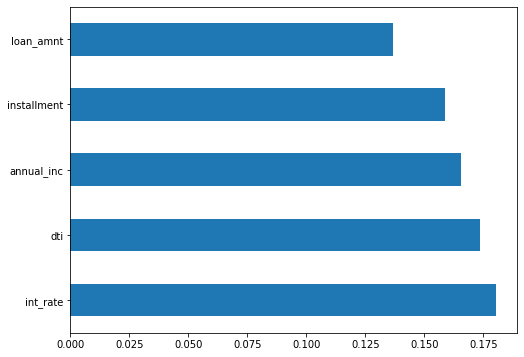

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [39]:
plt.rcParams['figure.figsize']= (8,6)

In [138]:
import seaborn as sns

In [142]:
#get correlations of each features in dataset
corrmat = df_concat.corr()


In [ ]:
# Features with the highest scores were

# Running a Logistic Regression Model

In [27]:
#Assigning dependent and independent variables to X and y
X = df_concat.drop("loan_status",1)
y = df_concat.loan_status

In [143]:
# Splitting the dataset into 70% training and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


# Confusion Matrix

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[    7 13898]
 [   22 62330]]


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.00      0.00     13905
           1       0.82      1.00      0.90     62352

    accuracy                           0.82     76257
   macro avg       0.53      0.50      0.45     76257
weighted avg       0.71      0.82      0.74     76257

